In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly 
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

In [2]:
df1 = pd.read_excel("mod_flares.xlsx")
df2 = pd.read_excel("mod_spots.xlsx")

In [3]:
df1.head()

,datacode,datetime,type,noaausaf
0,31777.0,1981-01-02 04:41:00,C 18,NaN
1,31777.0,1981-01-02 09:55:00,C 18,NaN
2,31777.0,1981-01-03 10:25:00,C 51,NaN
3,31777.0,1981-01-03 15:49:00,C 22,2857.0
4,31777.0,1981-01-03 18:37:00,C 22,NaN


In [4]:
df1 = pd.DataFrame(df1)

# Using loc to create new columns for alphabet and numeric parts
df1.loc[:, 'flare_letter'] = df1['type'].str.slice(0, 1)
df1.loc[:, 'flare_number'] = df1['type'].str.slice(1, 6)

In [5]:
df1.head()

,datacode,datetime,type,noaausaf,flare_letter,flare_number
0,31777.0,1981-01-02 04:41:00,C 18,NaN,C,18
1,31777.0,1981-01-02 09:55:00,C 18,NaN,C,18
2,31777.0,1981-01-03 10:25:00,C 51,NaN,C,51
3,31777.0,1981-01-03 15:49:00,C 22,2857.0,C,22
4,31777.0,1981-01-03 18:37:00,C 22,NaN,C,22


In [6]:
df1.columns

Index(['datacode', 'datetime', 'type', 'noaausaf', 'flare_letter',
       'flare_number'],
      dtype='object')

In [7]:
df2.head()

,datacode,datetime,northsouth,latitude,eastwest,meridiandist,magneticclass,magfieldstr,spotgrnr,sunspotnrMTW,...,penumbra,compactness,nrspots,longext,area,indMP,regMP,station,quality,stationab
0,11,1981-12-01 00:21:00,N,13,W,46,BG,NaN,NaN,NaN,...,K,I,32.0,12.0,600.0,81-11-27.5,81-11-27.5,938.0,4,LEAR
1,11,1981-12-01 01:15:00,N,13,W,46,NaN,NaN,NaN,NaN,...,H,I,16.0,11.0,530.0,81-11-27.6,81-11-27.5,205.0,2,MANI
2,11,1981-12-01 02:10:00,N,12,W,47,BG,NaN,NaN,NaN,...,H,O,22.0,14.0,710.0,81-11-27.5,81-11-27.5,626.0,2,PALE
3,11,1981-12-01 13:55:00,N,15,W,56,BG,NaN,NaN,NaN,...,H,I,31.0,13.0,670.0,81-11-27.3,81-11-27.5,468.0,2,RAMY
4,11,1981-12-01 15:35:00,N,13,W,55,BG,NaN,NaN,NaN,...,H,I,17.0,13.0,430.0,81-11-27.5,81-11-27.5,624.0,2,HOLL


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71985 entries, 0 to 71984
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datacode      71984 non-null  float64       
 1   datetime      71984 non-null  datetime64[ns]
 2   type          71957 non-null  object        
 3   noaausaf      38704 non-null  float64       
 4   flare_letter  71957 non-null  object        
 5   flare_number  71957 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 3.3+ MB


In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271879 entries, 0 to 271878
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   datacode       271879 non-null  int64         
 1   datetime       271832 non-null  datetime64[ns]
 2   northsouth     271879 non-null  object        
 3   latitude       271879 non-null  int64         
 4   eastwest       271879 non-null  object        
 5   meridiandist   271879 non-null  int64         
 6   magneticclass  267244 non-null  object        
 7   magfieldstr    36841 non-null   object        
 8   spotgrnr       36842 non-null   float64       
 9   sunspotnrMTW   87 non-null      object        
 10  noaausaf       269730 non-null  float64       
 11  sunspotnrNU    8761 non-null    object        
 12  zurich         234920 non-null  object        
 13  penumbra       234853 non-null  object        
 14  compactness    195770 non-null  object        
 15  

In [10]:
df1.describe()

,datacode,noaausaf
count,71984.000000,38704.000000
mean,31778.078379,4414.371305
std,190.783288,2953.049897
min,11777.000000,0.000000
25%,31777.000000,1410.000000
50%,31777.000000,4317.000000
75%,31777.000000,6908.000000
max,77777.000000,9997.000000


In [11]:
df1.columns

Index(['datacode', 'datetime', 'type', 'noaausaf', 'flare_letter',
       'flare_number'],
      dtype='object')

In [12]:
df2.describe()

,datacode,latitude,meridiandist,spotgrnr,noaausaf,nrspots,longext,area,station
count,271879.0,271879.000000,271879.000000,36842.000000,269730.000000,235035.000000,224319.000000,221349.000000,234585.000000
mean,11.0,15.461356,37.727408,27597.637235,7507.379049,8.040556,6.062732,146.546576,275.184799
std,0.0,7.492717,23.510222,2738.763884,2453.099087,10.727311,4.634338,254.230368,222.637243
min,11.0,0.000000,0.000000,22810.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,11.0,10.000000,17.000000,24963.000000,5484.000000,2.000000,2.000000,20.000000,99.000000
50%,11.0,15.000000,36.000000,27839.000000,7132.000000,4.000000,5.000000,60.000000,221.000000
75%,11.0,20.000000,57.000000,29903.000000,9472.000000,10.000000,9.000000,160.000000,395.000000
max,11.0,91.000000,93.000000,32191.000000,17840.000000,99.000000,90.000000,9980.000000,999.000000


In [13]:
df1.isnull().sum()

datacode            1
datetime            1
type               28
noaausaf        33281
flare_letter       28
flare_number       28
dtype: int64

In [14]:
df2.isnull().sum()

datacode              0
datetime             47
northsouth            0
latitude              0
eastwest              0
meridiandist          0
magneticclass      4635
magfieldstr      235038
spotgrnr         235037
sunspotnrMTW     271792
noaausaf           2149
sunspotnrNU      263118
zurich            36959
penumbra          37026
compactness       76109
nrspots           36844
longext           47560
area              50530
indMP                 0
regMP                 0
station           37294
quality           36859
stationab             0
dtype: int64

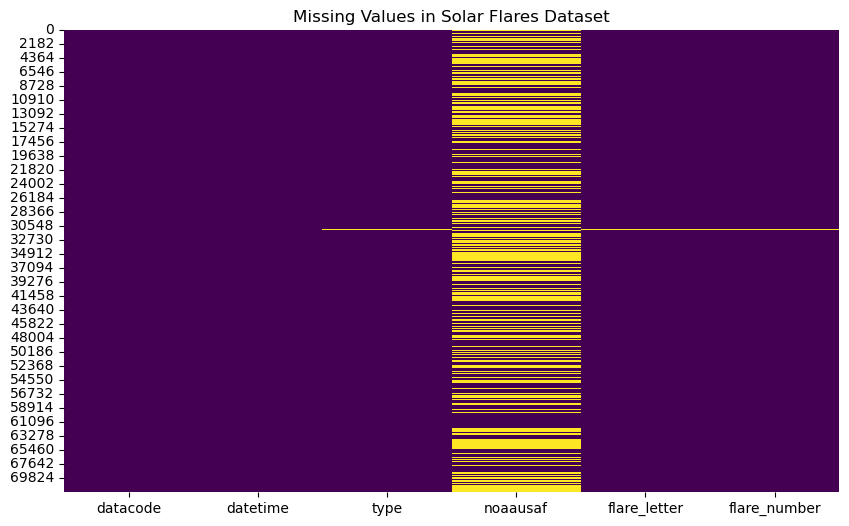

In [15]:
plt.figure(figsize=(10, 6))
sns.heatmap(df1.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Solar Flares Dataset')
plt.show()

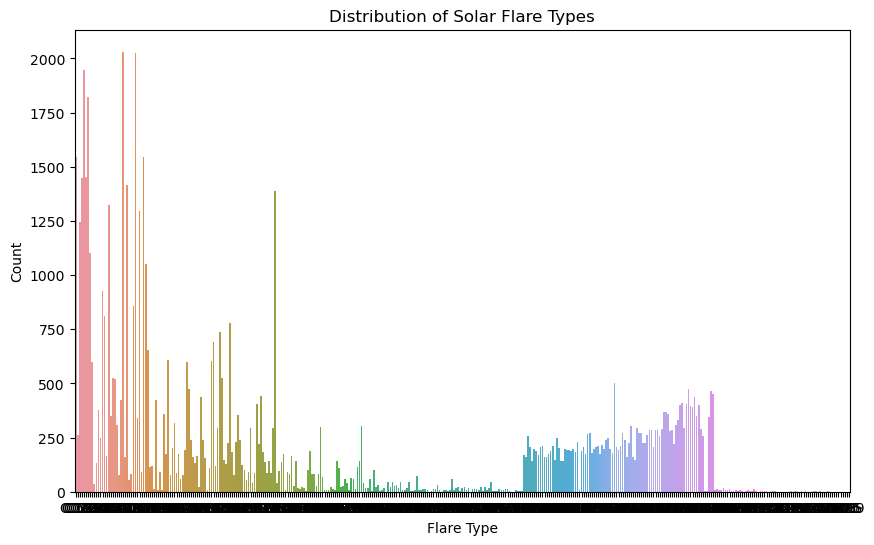

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=df1)
plt.title('Distribution of Solar Flare Types')
plt.xlabel('Flare Type')
plt.ylabel('Count')
plt.show()


Top 20 Flare Types:
C 11    2031
C 10    2026
C 12    1945
C 13    1821
C 18    1546
C 14    1544
C 20    1454
C 19    1449
C 17    1418
C 16    1387
C 21    1324
C 15    1298
C 22    1243
C 23    1104
C 24    1052
C 25     928
C 26     857
C 27     810
C 28     779
C 29     739
Name: type, dtype: int64


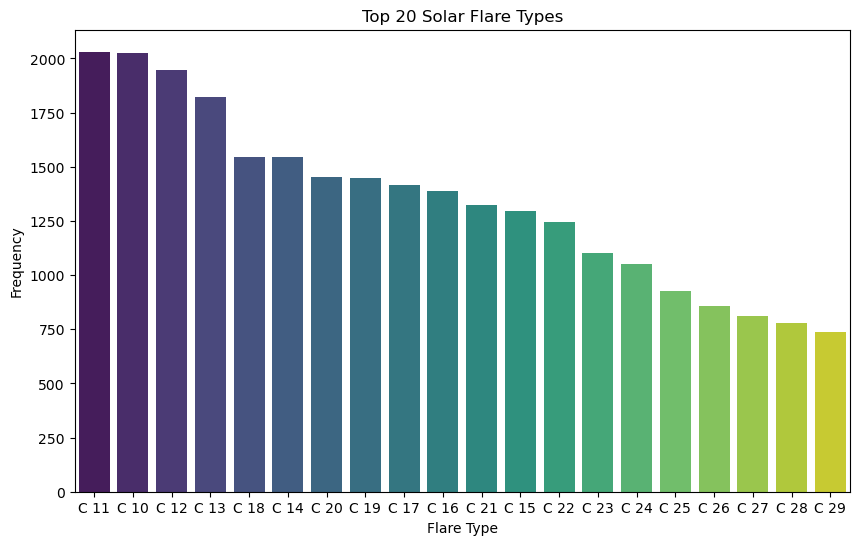

In [17]:
# Count the frequency of each flare type
flare_type_counts = df1['type'].value_counts()

# Display the top 20 flare types
top_10_flare_types = flare_type_counts.head(20)
print("Top 20 Flare Types:")
print(top_10_flare_types)

# Plotting the top 10 flare types
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_flare_types.index, y=top_10_flare_types.values, palette='viridis')
plt.xlabel('Flare Type')
plt.ylabel('Frequency')
plt.title('Top 20 Solar Flare Types')
plt.show()

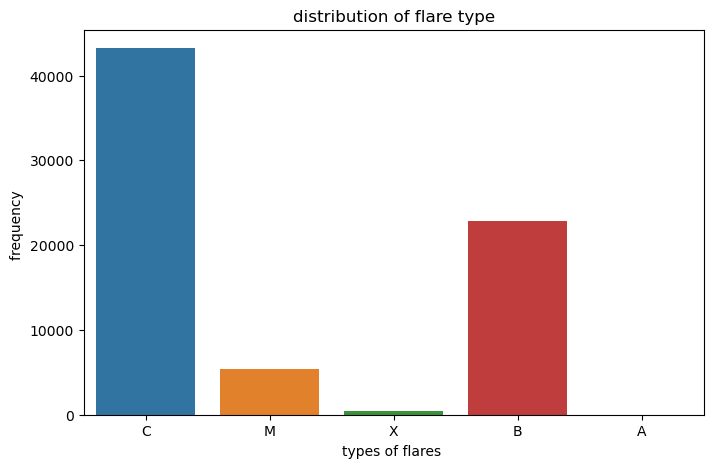

In [18]:
plt.figure(figsize=(8, 5))
sns.countplot(x='flare_letter', data=df1)
plt.xlabel('types of flares ')
plt.ylabel('frequency ')
plt.title('distribution of flare type')
plt.show()

In [19]:
df2.columns

Index(['datacode', 'datetime', 'northsouth', 'latitude', 'eastwest',
       'meridiandist', 'magneticclass', 'magfieldstr', 'spotgrnr',
       'sunspotnrMTW', 'noaausaf', 'sunspotnrNU', 'zurich', 'penumbra',
       'compactness', 'nrspots', 'longext', 'area', 'indMP', 'regMP',
       'station', 'quality', 'stationab'],
      dtype='object')

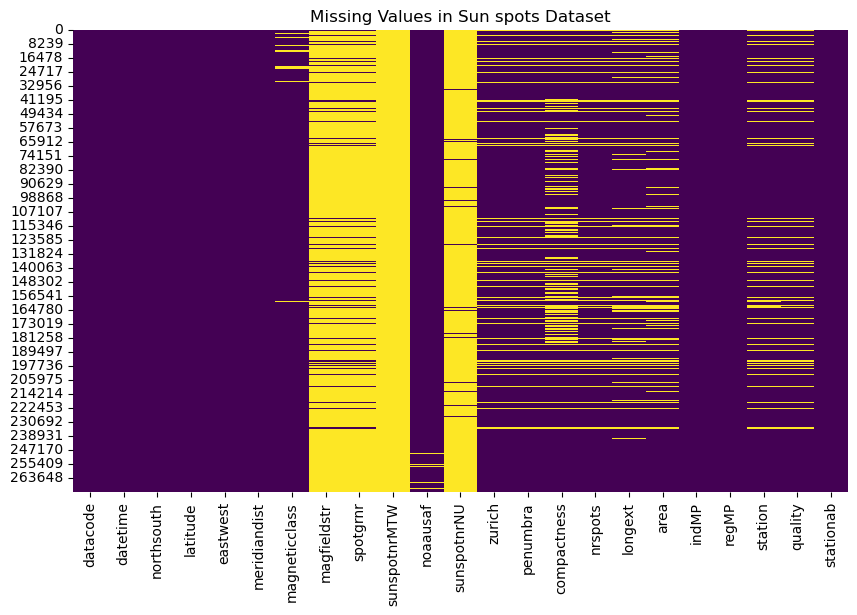

In [20]:
plt.figure(figsize=(10, 6))
sns.heatmap(df2.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Sun spots Dataset')
plt.show()

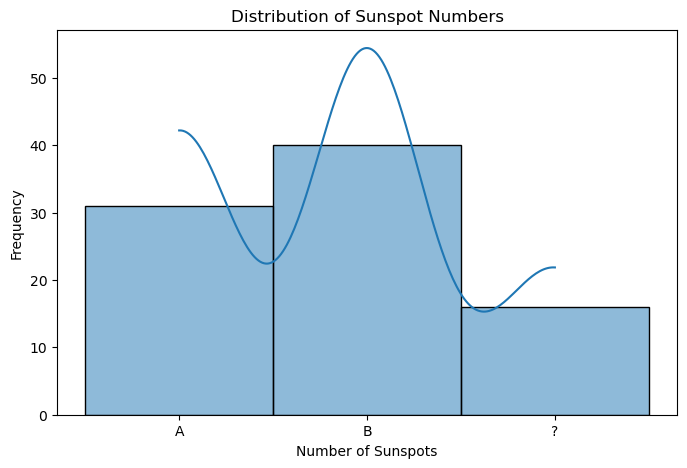

In [21]:
plt.figure(figsize=(8, 5))
sns.histplot(df2['sunspotnrMTW'], bins=20, kde=True)
plt.xlabel('Number of Sunspots')
plt.ylabel('Frequency')
plt.title('Distribution of Sunspot Numbers')
plt.show()

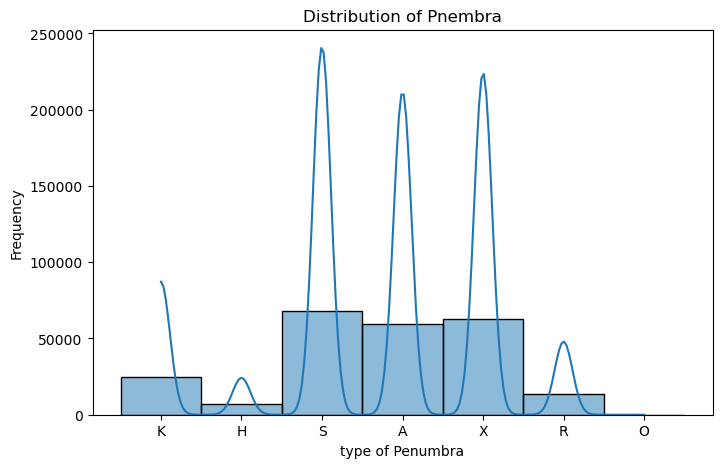

In [22]:
plt.figure(figsize=(8, 5))
sns.histplot(df2['penumbra'], bins=20, kde=True)
plt.xlabel('type of Penumbra')
plt.ylabel('Frequency')
plt.title('Distribution of Pnembra')
plt.show()

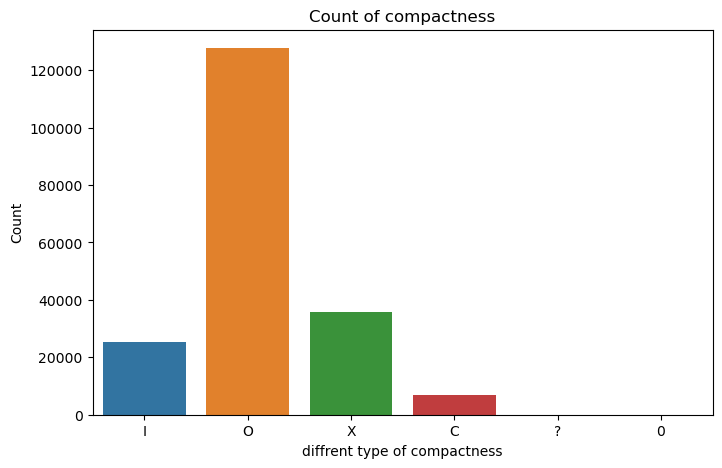

In [23]:
plt.figure(figsize=(8, 5))
sns.countplot(x='compactness', data=df2)
plt.xlabel('diffrent type of compactness')
plt.ylabel('Count')
plt.title('Count of compactness')
plt.show()

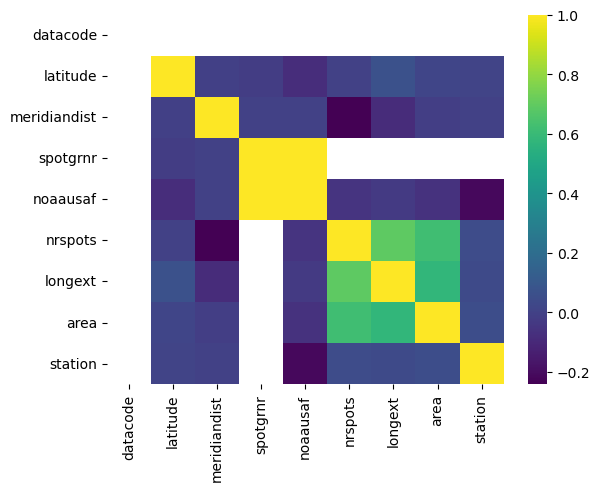

In [24]:
sns.heatmap(df2.corr(),cmap="viridis")
plt.show()

In [25]:
df2.corr()

,datacode,latitude,meridiandist,spotgrnr,noaausaf,nrspots,longext,area,station
datacode,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,NaN,1.000000,-0.008120,-0.019289,-0.082250,0.000892,0.066739,0.014363,0.009576
meridiandist,NaN,-0.008120,1.000000,-0.000467,-0.000980,-0.241342,-0.086758,-0.013949,-0.002910
spotgrnr,NaN,-0.019289,-0.000467,1.000000,0.999344,NaN,NaN,NaN,NaN
noaausaf,NaN,-0.082250,-0.000980,0.999344,1.000000,-0.056375,-0.030076,-0.066501,-0.215898
nrspots,NaN,0.000892,-0.241342,NaN,-0.056375,1.000000,0.690994,0.620398,0.042404
longext,NaN,0.066739,-0.086758,NaN,-0.030076,0.690994,1.000000,0.577760,0.037944
area,NaN,0.014363,-0.013949,NaN,-0.066501,0.620398,0.577760,1.000000,0.045494
station,NaN,0.009576,-0.002910,NaN,-0.215898,0.042404,0.037944,0.045494,1.000000


# good co relation between noaausaf and spotgrnr better than average between longext and nrspots, area nrspots,longext area 

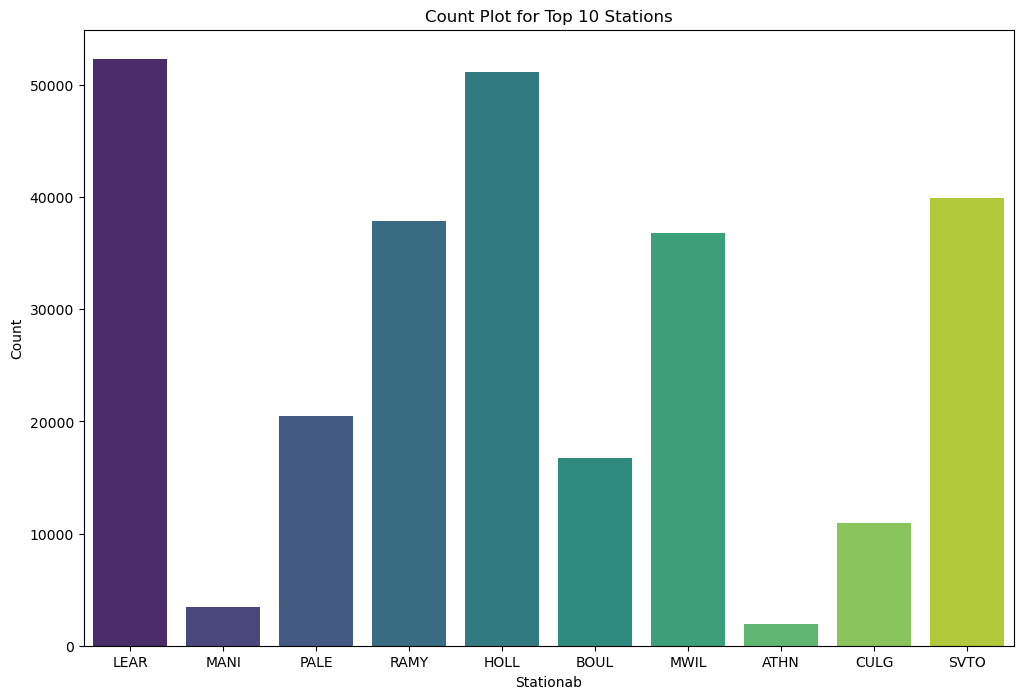

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'stationab' is a categorical column in your dataset
top_10_stations = df2['stationab'].value_counts().head(10).index

plt.figure(figsize=(12, 8))
sns.countplot(x='stationab', data=df2[df2['stationab'].isin(top_10_stations)], palette='viridis')
plt.title('Count Plot for Top 10 Stations')
plt.xlabel('Stationab')
plt.ylabel('Count')
plt.show()

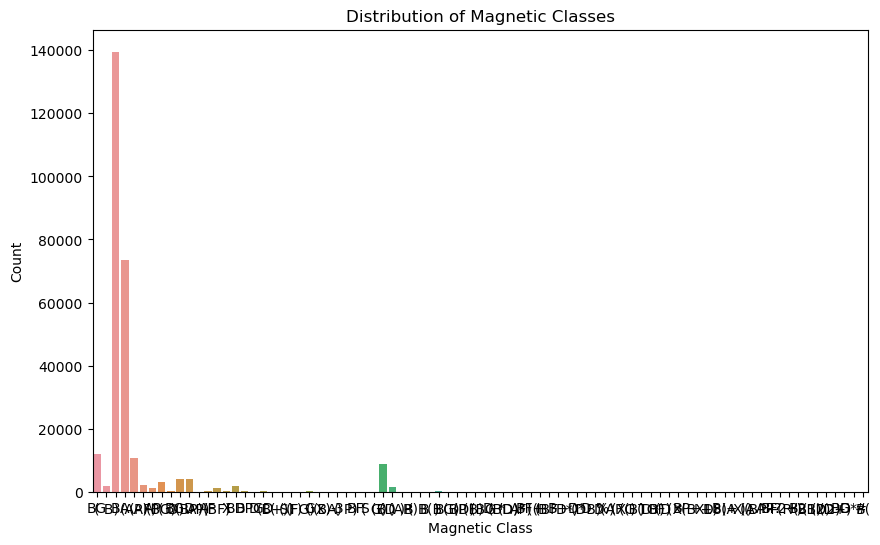

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(x='magneticclass', data=df2)
plt.title('Distribution of Magnetic Classes')
plt.xlabel('Magnetic Class')
plt.ylabel('Count')
plt.show()

Top 10 magneticclass Types:
B       139553
A        73432
BG       11849
(AP)     10755
(B )      8876
(BP)      4113
BGD       4008
(BG)      3043
(AF)      2273
( B)      1972
Name: magneticclass, dtype: int64


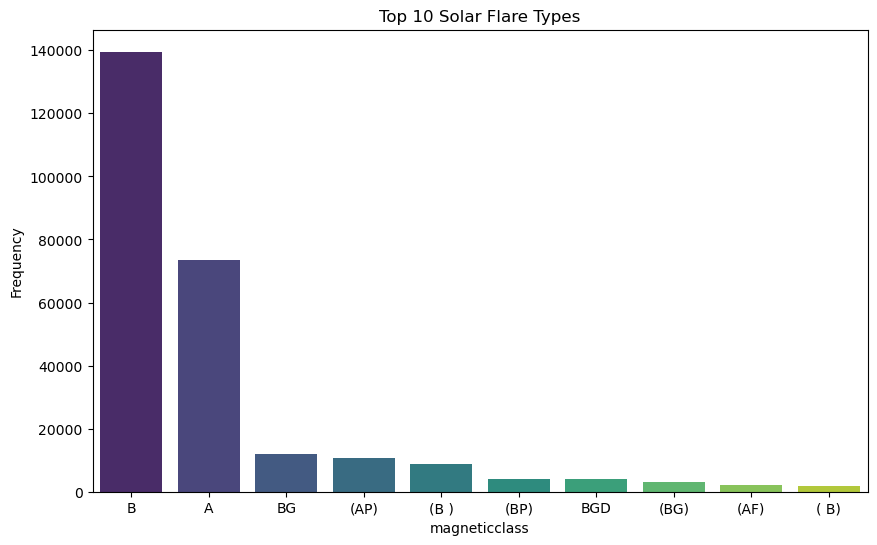

In [29]:
# Count the frequency of each flare type
flare_type_counts = df2['magneticclass'].value_counts()

# Display the top 20 flare types
top_10_magneticclass_types = flare_type_counts.head(10)
print("Top 10 magneticclass Types:")
print(top_10_magneticclass_types)

# Plotting the top 10 flare types
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_magneticclass_types.index, y=top_10_magneticclass_types.values, palette='viridis')
plt.xlabel('magneticclass')
plt.ylabel('Frequency')
plt.title('Top 10 Solar Flare Types')
plt.show()

In [30]:
columns_to_drop = ['sunspotnrMTW', 'magfieldstr', 'spotgrnr', 'sunspotnrNU', 'quality']
df2.drop(columns=columns_to_drop, axis=1, inplace=True)

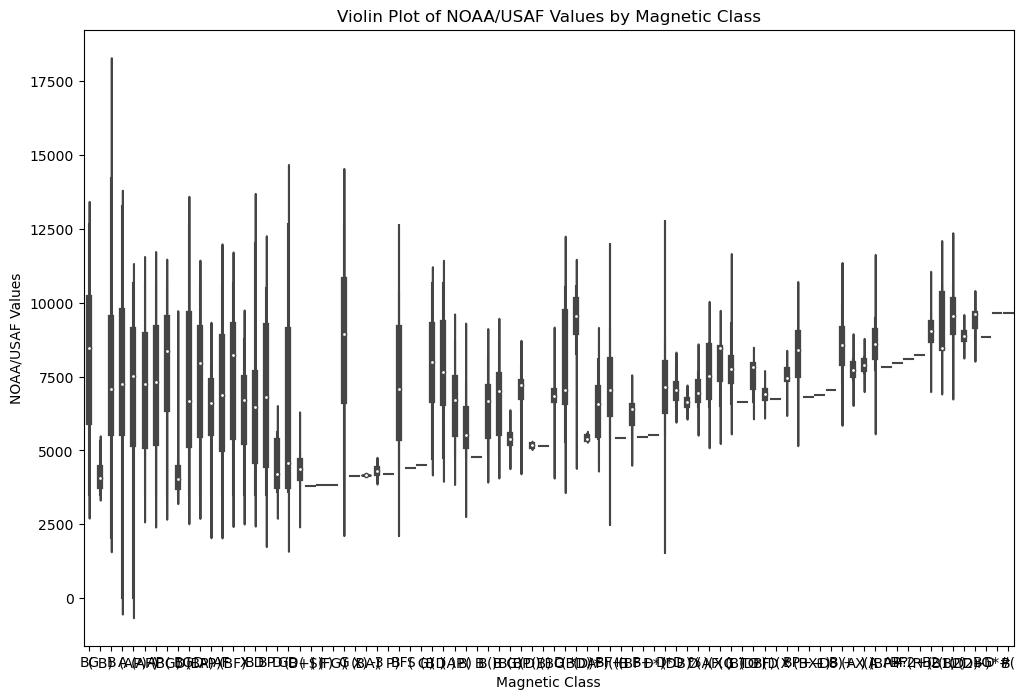

In [31]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='magneticclass', y='noaausaf', data=df2)
plt.title('Violin Plot of NOAA/USAF Values by Magnetic Class')
plt.xlabel('Magnetic Class')
plt.ylabel('NOAA/USAF Values')
plt.show()

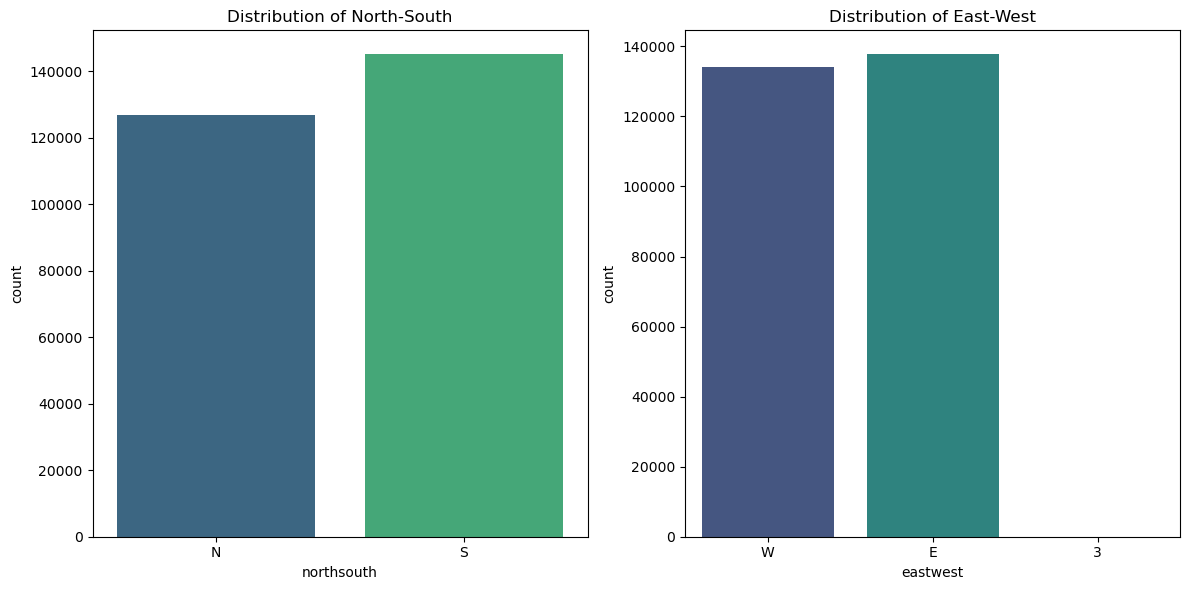

In [32]:
# Assuming 'northsouth' and 'eastwest' are categorical columns in df2
plt.figure(figsize=(12, 6))

# Bar Plot for 'northsouth'
plt.subplot(1, 2, 1)
sns.countplot(x='northsouth', data=df2, palette='viridis')
plt.title('Distribution of North-South')

# Bar Plot for 'eastwest'
plt.subplot(1, 2, 2)
sns.countplot(x='eastwest', data=df2, palette='viridis')
plt.title('Distribution of East-West')

plt.tight_layout()
plt.show()

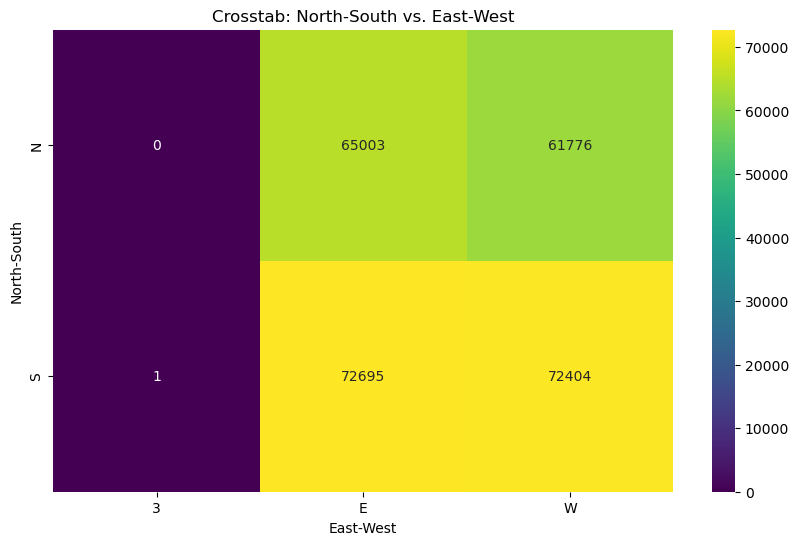

In [33]:
# Assuming 'northsouth' and 'eastwest' are categorical columns in df2
cross_tab = pd.crosstab(df2['northsouth'], df2['eastwest'])

plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='viridis')
plt.title('Crosstab: North-South vs. East-West')
plt.xlabel('East-West')
plt.ylabel('North-South')
plt.show()

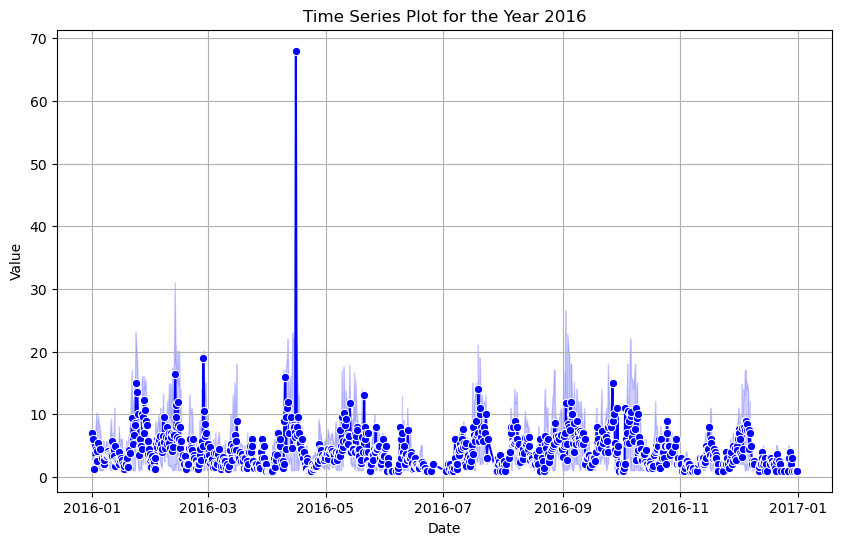

In [34]:
# Filter data for the year 2016
df_2016 = df2[df2['datetime'].dt.year == 2016]

# Plot the time series data
plt.figure(figsize=(10, 6))
sns.lineplot(df_2016['datetime'],df_2016['nrspots'], marker='o', linestyle='-', color='b')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Plot for the Year 2016')

df_resampled = df_2016.resample('M', on='datetime').mean()  # Resample to monthly averages


# Display the plot
plt.grid(True)
plt.show()

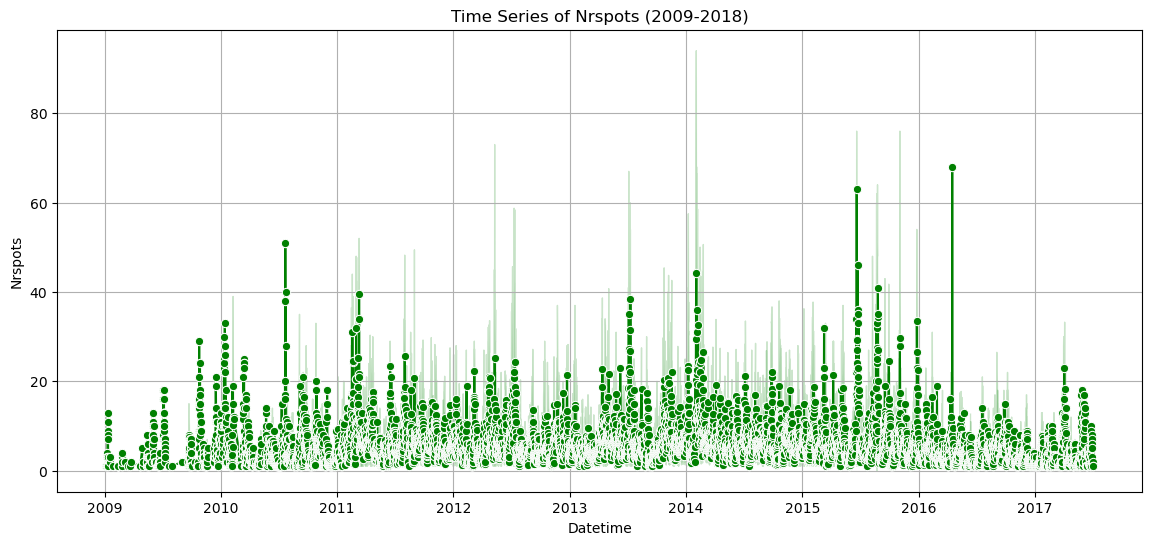

In [35]:
df2_filtered = df2[(df2['datetime'].dt.year >= 2009) & (df2['datetime'].dt.year <= 2018)]

plt.figure(figsize=(14, 6))
sns.lineplot(x='datetime', y='nrspots', data=df2_filtered, marker='o', color='green')
plt.title('Time Series of Nrspots (2009-2018)')
plt.xlabel('Datetime')
plt.ylabel('Nrspots')
plt.grid(True)
plt.show()


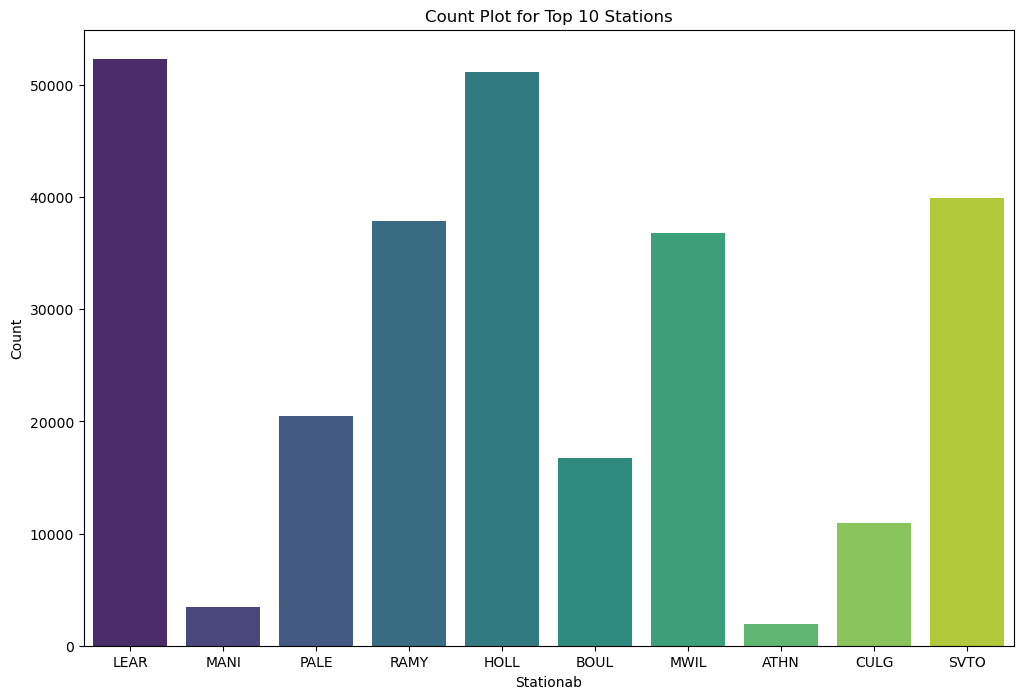

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'stationab' is a categorical column in your dataset
top_10_stations = df2['stationab'].value_counts().head(10).index

plt.figure(figsize=(12, 8))
sns.countplot(x='stationab', data=df2[df2['stationab'].isin(top_10_stations)], palette='viridis')
plt.title('Count Plot for Top 10 Stations')
plt.xlabel('Stationab')
plt.ylabel('Count')
plt.show()